# A test dataset to analyse performance of montessori pupils

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dython

In [17]:
# build the dataframe
#np.random.seed(42)
df = pd.DataFrame ({'student_id' : np.arange(1,202), 'age':np.random.randint(6,10,201),'basic_science':np.random.randint(30,60,201),\
'literacy':np.random.randint(20,60,201), 'quantitative_reasoning' :np.random.randint(28,60,201), "literature" :np.random.randint(28,60,201),\
"ict" : np.random.randint(35,60,201), "ettiquette": np.random.randint(40,60,201), "history": np.random.randint(40,60,201),\
                   "music": np.random.randint(40,60,201)})

In [18]:
df.student_id= df.student_id.apply(lambda x: 'student_id'+'_'+str(x))

In [19]:
df['total_grade'] = df.apply(lambda x: x['basic_science'] +  x.literacy + x.quantitative_reasoning \
    + x.literature + x.ict + x.ettiquette + x.history + x.music, axis = 1)

In [20]:
df

,student_id,age,basic_science,literacy,quantitative_reasoning,literature,ict,ettiquette,history,music,total_grade
0,student_id_1,9,40,50,38,40,58,58,43,51,378
1,student_id_2,8,46,40,28,59,59,44,41,44,361
2,student_id_3,7,34,26,49,58,46,48,54,53,368
3,student_id_4,9,35,41,43,59,57,55,59,57,406
4,student_id_5,6,44,50,30,31,59,51,47,42,354
...,...,...,...,...,...,...,...,...,...,...,...
196,student_id_197,7,40,53,30,43,57,53,42,49,367
197,student_id_198,6,58,23,33,53,51,55,56,48,377
198,student_id_199,8,49,51,55,49,41,51,51,44,391
199,student_id_200,7,45,36,44,46,59,53,40,51,374


In [21]:
# age distributiion
df_age = df.age.value_counts()

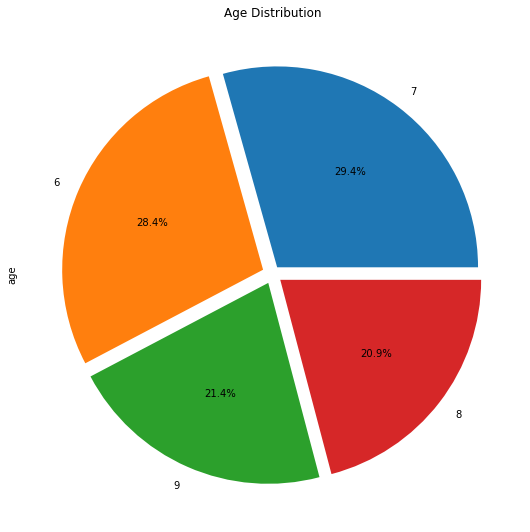

In [22]:
fig,ax = plt.subplots(figsize = (9,10))
df_age.plot(kind = 'pie', explode=[0.04, 0.05, 0.05, 0.05],autopct='%1.1f%%')
ax.set(title = 'Age Distribution');

In [23]:
df.describe()

,age,basic_science,literacy,quantitative_reasoning,literature,ict,ettiquette,history,music,total_grade
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,7.353234,43.646766,39.572139,44.104478,43.621891,47.019900,49.233831,49.099502,49.741294,366.039801
std,1.108874,7.790353,12.100662,8.814422,9.519786,7.814064,5.554282,5.752395,5.563518,22.416030
min,6.000000,30.000000,20.000000,28.000000,28.000000,35.000000,40.000000,40.000000,40.000000,306.000000
25%,6.000000,37.000000,29.000000,37.000000,36.000000,39.000000,44.000000,44.000000,45.000000,351.000000
50%,7.000000,43.000000,40.000000,45.000000,44.000000,47.000000,49.000000,49.000000,50.000000,364.000000
75%,8.000000,50.000000,50.000000,50.000000,52.000000,54.000000,54.000000,54.000000,54.000000,381.000000
max,9.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,434.000000


In [30]:
df.isna().sum()

student_id                0
age                       0
basic_science             0
literacy                  0
quantitative_reasoning    0
literature                0
ict                       0
ettiquette                0
history                   0
music                     0
total_grade               0
dtype: int64

<AxesSubplot:>

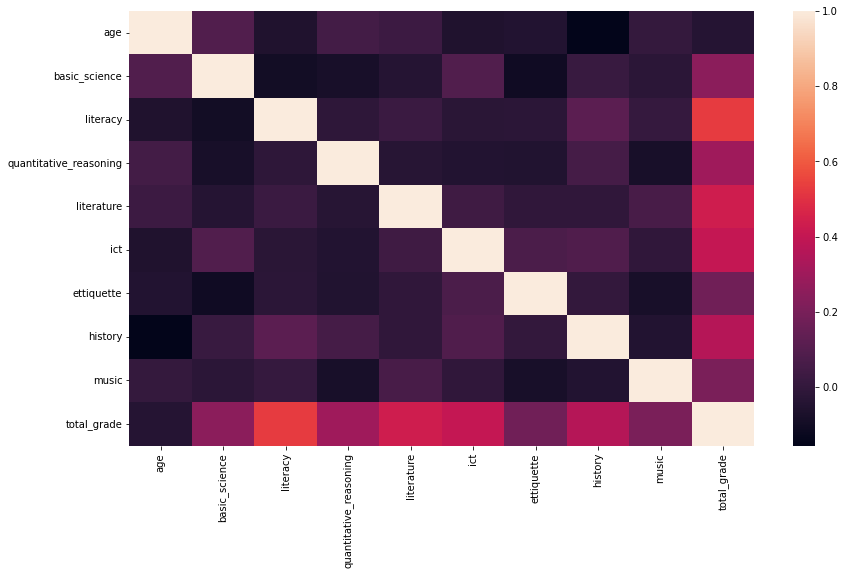

In [24]:
fig,ax = plt.subplots(figsize = (14,8))
sns.heatmap(df.corr())

In [25]:
df_grade = df.loc[:,['student_id','total_grade']]
df_grade.sort_values('total_grade', ascending = False)

,student_id,total_grade
192,student_id_193,434
162,student_id_163,426
31,student_id_32,420
25,student_id_26,416
55,student_id_56,416
...,...,...
6,student_id_7,328
126,student_id_127,324
27,student_id_28,323
112,student_id_113,307


<AxesSubplot:xlabel='total_grade', ylabel='student_id'>

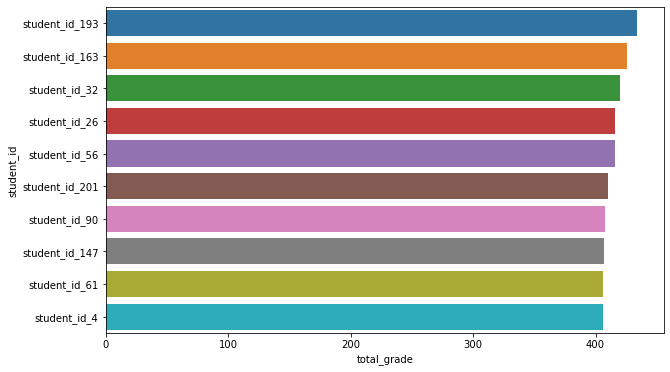

In [26]:
# top ten student
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df_grade[:10], y = df_grade.sort_values('total_grade', ascending = False).student_id[:10]\
            ,  x = df_grade.sort_values('total_grade', ascending = False).total_grade[:10])

In [27]:
df.quantitative_reasoning.corr(df.basic_science)

-0.0820317314116544

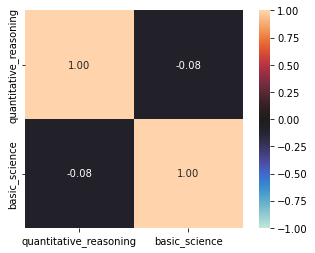

{'corr':                         quantitative_reasoning  basic_science
 quantitative_reasoning                1.000000      -0.082032
 basic_science                        -0.082032       1.000000,
 'ax': <AxesSubplot:>}

In [28]:
from dython.nominal import associations
associations(df.loc[:,['quantitative_reasoning','basic_science']])

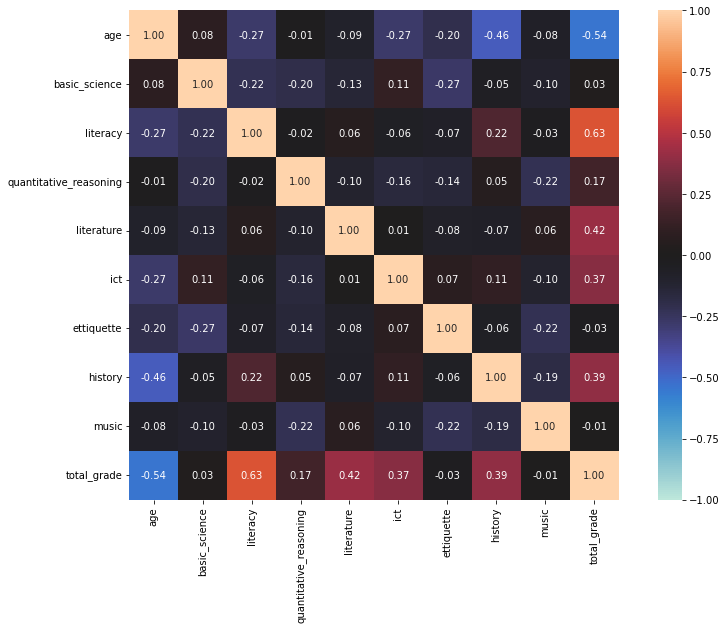

{'corr':                              age  basic_science  literacy  \
 age                     1.000000       0.081346 -0.274074   
 basic_science           0.081346       1.000000 -0.219495   
 literacy               -0.274074      -0.219495  1.000000   
 quantitative_reasoning -0.014679      -0.197045 -0.016382   
 literature             -0.090765      -0.133557  0.060394   
 ict                    -0.273750       0.111736 -0.061301   
 ettiquette             -0.203486      -0.268695 -0.071384   
 history                -0.458865      -0.050298  0.218644   
 music                  -0.075753      -0.100655 -0.028836   
 total_grade            -0.543909       0.028033  0.628867   
 
                         quantitative_reasoning  literature       ict  \
 age                                  -0.014679   -0.090765 -0.273750   
 basic_science                        -0.197045   -0.133557  0.111736   
 literacy                             -0.016382    0.060394 -0.061301   
 quantitative_re

In [29]:
associations(df.corr(), figsize = (14,9))